In [ ]:
#!pip install gdown
#دانلود کردن دیتاست
#Salary dataset  
!gdown --id 1NgT-hM1xDVpnharJVtCwN4FiJE46XGBL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NgT-hM1xDVpnharJVtCwN4FiJE46XGBL
To: /content/Session04.Workshop1.Salary_Data.csv
100% 454/454 [00:00<00:00, 708kB/s]


In [9]:
# Step 1 Load Data
import pandas as pd
dataset = pd.read_csv('Session04.Workshop1.Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [6]:
dataset.shape

(30, 2)

In [8]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
# Step 2: Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [12]:
# Step 3: Fit Simple Linear Regression to Training Data
from sklearn.linear_model import SGDRegressor
sgdreg = SGDRegressor()
sgdreg.fit(X_train, y_train)

SGDRegressor()

In [14]:
y_hat = sgdreg.predict(X_test)

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test, y_hat)

0.946004244062829

In [18]:
w0_sgd = sgdreg.intercept_
w1_sgd = sgdreg.coef_
print("Estimated coefficients by SGD:\nw_0 = {}  \
      \nw_1 = {}".format(w0_sgd, w1_sgd))

Estimated coefficients by SGD:
w_0 = [20517.90660122]        
w_1 = [10155.89261753]


In [19]:
# from locale import normalize
# Step 3: Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training phase

LinearRegression()

In [20]:
# Step 4: Make Prediction
y_pred = regressor.predict(X_test) #test phase

In [21]:
r2_score(y_test, y_pred)

0.9553063138044949

In [22]:
w0_LR = regressor.intercept_
w1_LR = regressor.coef_
print("Estimated coefficients by Linear Regression:\nw_0 = {}  \
      \nw_1 = {}".format(w0_LR, w1_LR))

Estimated coefficients by Linear Regression:
w_0 = 25324.33537924433        
w_1 = [9426.03876907]


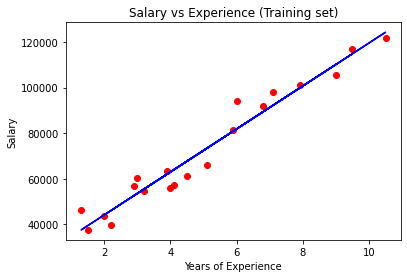

In [23]:
# Step 5 - Visualize training set results
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line (trick)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

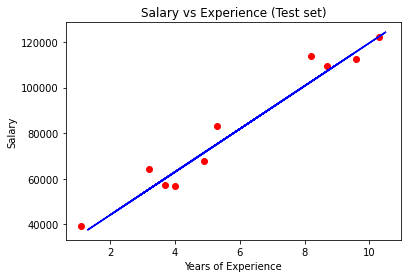

In [24]:
# Step 6 - Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [25]:
# Step 7 - Make new prediction
new_salary_pred = regressor.predict([[15]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [166714.91691537]


In [26]:
regressor.score(X_train, y_train, sample_weight=None)

0.9549236946181227

##Normal Equation in Action


In [27]:
#Find Weight Function
def find_Weight(X, y):
    
    m = X.shape[0] # Number of training examples. 
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)    
    # reshaping y to (m,1)
    y = y.reshape(m,1)
    
    # The Normal Equation
    Weight = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    
    return Weight

In [28]:
#Predict Function
def predict(X):
    
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    # preds is y_hat which is the dot product of X and weight.
    preds = np.dot(X, W_NE)
    
    return preds

In [29]:
#Plotting Predictions
# Getting the Value of weight using the find_weight function.
import numpy as np
W_NE = find_Weight(X_train, y_train)
print("Estimated coefficients by Normal Equation:\nw_0 = {}  \
      \nw_1 = {}".format(W_NE[1], W_NE[0]))

Estimated coefficients by Normal Equation:
w_0 = [25324.33537924]        
w_1 = [9426.03876907]


In [30]:
# Getting the predictions on X using the predict function.
preds = predict(X_test)

In [31]:
w0_LR

25324.33537924433

In [35]:
W_NE[1][0]

25324.33537924447

این دو عد بالا رو با هم مقایسه کنید میبینید که خبلی شبیه به هم هستند.
w0_lr , w+NE[1][0]
قبول دارید که باید این دو عدد باید با هم برابر باشند

In [36]:
W_NE[1][0] == w0_LR
#در اینجا داریم بررسی میکنیم ه آیا این دو واقعا با هم برابر هستند یا نه
#ب همین دلیل ما یک تابعی رو فراخونی میکنیم به نام ایزکلوز که در واقع اعداد رو گرد میکنه

False

In [37]:
import math
math.isclose(W_NE[1][0], w0_LR)
#این تابع تعیین میکنند که آیا دو عدد به اندازه کافی به هم نزدیک هستند یا نه

True

#Statistical Method 


In [38]:
def estimate_coef(x, y):
    # number of observations/points

    n = len(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(np.dot((np.array(x)[:,0]), y)) - (n * m_y * m_x)
    SS_xx = np.sum(np.multiply(x, x)) - (n * m_x * m_x)

    # calculating regression coefficients
    w_1 = SS_xy / SS_xx
    w_0 = m_y - w_1 * m_x 
 
    return (w_0, w_1)

Estimated coefficients:
w_0 = 25324.33537924439        
w_1 = 9426.038769074823


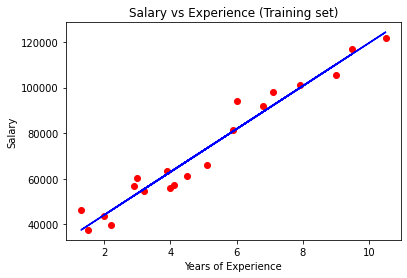

In [39]:
# estimating coefficients
import numpy as np
W_Stat = estimate_coef(X_train, y_train)
print("Estimated coefficients:\nw_0 = {}  \
      \nw_1 = {}".format(W_Stat[0], W_Stat[1]))
len(X_train)
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, W_Stat[0] + W_Stat[1] * X_train, color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()